In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-info">
    <strong>NOTE: </strong>VAR is used when there is <strong>interdependability</strong> between the variables
</div>

In [3]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

In [4]:
PATH_ONE = '../Data/M2SLMoneyStock.csv'

df = pd.read_csv(PATH_ONE, index_col=0, parse_dates=True)
df.index.freq = 'MS'

PATH_TWO = '../Data/PCEPersonalSpending.csv'

sp = pd.read_csv(PATH_TWO, index_col=0, parse_dates=True)
sp.index.freq = 'MS'

In [5]:
df.head()

,Money
Date,
1995-01-01,3492.4
1995-02-01,3489.9
1995-03-01,3491.1
1995-04-01,3499.2
1995-05-01,3524.2


In [6]:
sp.head()

,Spending
Date,
1995-01-01,4851.2
1995-02-01,4850.8
1995-03-01,4885.4
1995-04-01,4890.2
1995-05-01,4933.1


In [7]:
df = df.join(sp)

In [8]:
df.head()

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1


In [9]:
df = df.dropna()

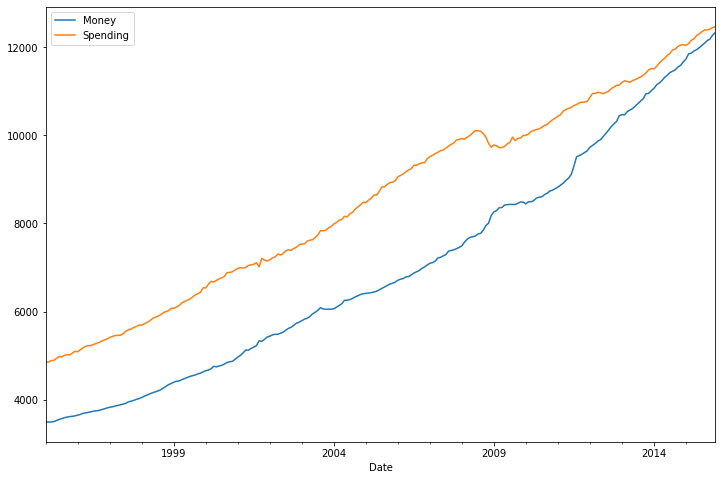

In [10]:
df.plot(figsize=(12, 8))

In [11]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') 
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())      
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [12]:
adf_test(df['Money'])

Augmented Dickey-Fuller Test: 
ADF test statistic        4.239022
p-value                   1.000000
# lags used               4.000000
# observations          247.000000
critical value (1%)      -3.457105
critical value (5%)      -2.873314
critical value (10%)     -2.573044
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [13]:
adf_test(df['Spending'])

Augmented Dickey-Fuller Test: 
ADF test statistic        0.149796
p-value                   0.969301
# lags used               3.000000
# observations          248.000000
critical value (1%)      -3.456996
critical value (5%)      -2.873266
critical value (10%)     -2.573019
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [14]:
df_transformed = df.diff()

In [15]:
adf_test(df_transformed['Money'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -2.057404
p-value                   0.261984
# lags used              15.000000
# observations          235.000000
critical value (1%)      -3.458487
critical value (5%)      -2.873919
critical value (10%)     -2.573367
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [16]:
adf_test(df_transformed['Spending'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -7.226974e+00
p-value                 2.041027e-10
# lags used             2.000000e+00
# observations          2.480000e+02
critical value (1%)    -3.456996e+00
critical value (5%)    -2.873266e+00
critical value (10%)   -2.573019e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [17]:
df_transformed = df_transformed.diff().dropna()

In [18]:
adf_test(df_transformed['Money'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -7.077471e+00
p-value                 4.760675e-10
# lags used             1.400000e+01
# observations          2.350000e+02
critical value (1%)    -3.458487e+00
critical value (5%)    -2.873919e+00
critical value (10%)   -2.573367e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [19]:
df_transformed.head()

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7


In [20]:
df_transformed.shape

(250, 2)

In [21]:
# Train Test Split

n_obs = 12

train = df_transformed.iloc[:-n_obs]
test = df_transformed.iloc[-n_obs:]

### GridSearch

In [22]:
model = VAR(train)

min_aic = 1e8
p_value = None

for p in range(1, 8):
    results = model.fit(p)
#     print('-'*13)
#     print(f'ORDER: {p}')
#     print(f'AIC: {results.aic}')
#     print('-'*13)
    if results.aic < min_aic:
        min_aic = results.aic
        p_value = p

print('='*50)
print(f'MIN ORDER: {p_value}')
print(f'MIN AIC: {min_aic}')
print('='*50)

MIN ORDER: 5
MIN AIC: 13.78730034460964


In [23]:
results = model.fit(5)

In [24]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 15, Jun, 2020
Time:                     01:16:55
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1131
Nobs:                     233.000    HQIC:                   13.9187
Log likelihood:          -2245.45    FPE:                    972321.
AIC:                      13.7873    Det(Omega_mle):         886628.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.516683         1.782238            0.290           0.772
L1.Money           -0.646232         0.068177           -9.479           0.000
L1.Spending        -0.107411         0.051388           -2.090      

In [25]:
# Grab p lagged values before the test set
## NOTE: numpy array (p,k) p - order, k - features

lagged_values = train.values[-5:]

In [26]:
z = results.forecast(y=lagged_values, steps=n_obs)

In [27]:
test.head()

,Money,Spending
Date,,
2015-01-01,-15.5,-26.6
2015-02-01,56.1,52.4
2015-03-01,-102.8,39.5
2015-04-01,30.9,-40.4
2015-05-01,-15.8,38.8


In [28]:
idx = pd.date_range('2015-01-01', periods=12, freq='MS')

# 2d - 2 difference
df_forecast = pd.DataFrame(z, index=idx, columns=['Money_2d', 'Spending_2d'])

In [29]:
df_forecast.head()

,Money_2d,Spending_2d
2015-01-01,-16.995276,36.149820
2015-02-01,-3.174038,-11.450298
2015-03-01,-0.377725,-6.684969
2015-04-01,-2.602233,5.479458
2015-05-01,4.228557,-2.443365


### Reverse Difference

In [30]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Money_1d'] = (df['Money'].iloc[-n_obs-1]-df['Money'].iloc[-n_obs-2]) + df_forecast['Money_2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['MoneyForecast'] = df['Money'].iloc[-n_obs-1] + df_forecast['Money_1d'].cumsum()

In [31]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Spending_1d'] = (df['Spending'].iloc[-n_obs-1]-df['Spending'].iloc[-n_obs-2]) + df_forecast['Spending_2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['SpendingForecast'] = df['Spending'].iloc[-n_obs-1] + df_forecast['Spending_1d'].cumsum()

In [32]:
test_range = df[-n_obs:]

In [33]:
df_forecast.columns

Index(['Money_2d', 'Spending_2d', 'Money_1d', 'MoneyForecast', 'Spending_1d',
       'SpendingForecast'],
      dtype='object')

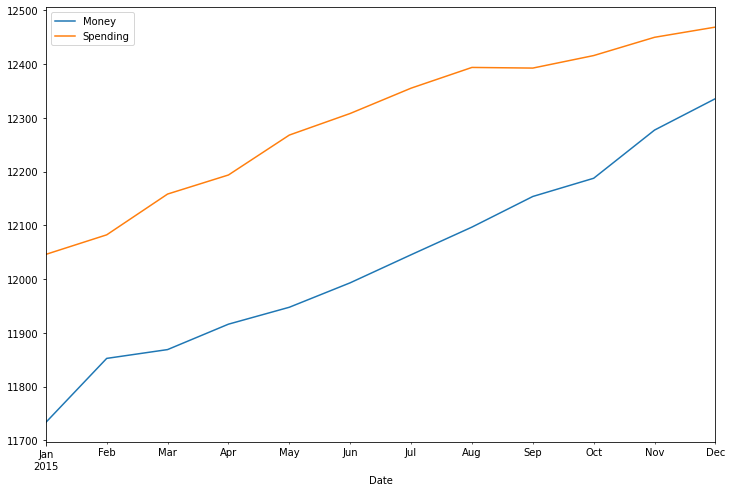

In [34]:
test_range.plot(legend=True, figsize=(12, 8))

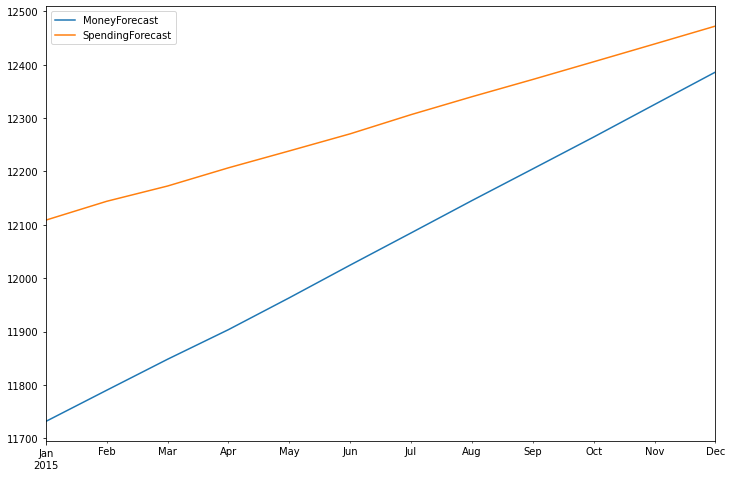

In [35]:
df_forecast[['MoneyForecast', 'SpendingForecast']].plot(figsize=(12,8))

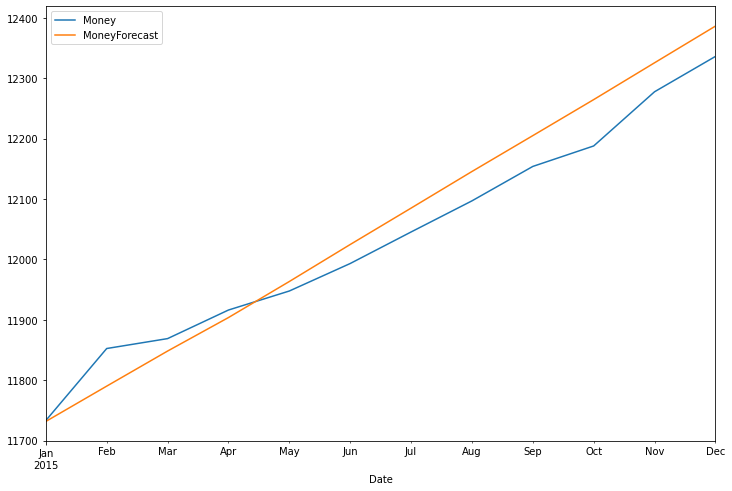

In [36]:
test_range['Money'].plot(legend=True, figsize=(12, 8))
df_forecast['MoneyForecast'].plot(legend=True, figsize=(12, 8))

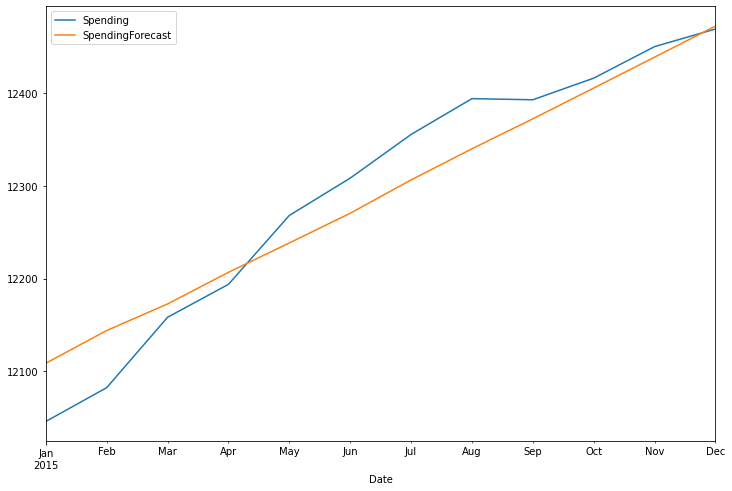

In [37]:
test_range['Spending'].plot(legend=True, figsize=(12, 8))
df_forecast['SpendingForecast'].plot(legend=True, figsize=(12, 8))

In [38]:
rmse(test_range['Money'], df_forecast['MoneyForecast'])

43.71049653558893

In [39]:
test_range['Money'].mean()

12034.008333333333

In [40]:
rmse(test_range['Spending'], df_forecast['SpendingForecast'])

37.001175169408285

In [41]:
test_range['Spending'].mean()

12294.533333333335